In [30]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


In [31]:
File_name = '12859_2019_2897_MOESM2_ESM.xlsx'

sheet_names = pd.ExcelFile(File_name).sheet_names
sheets = {}
for sheet in sheet_names:
    sheets[sheet] = pd.read_excel(File_name,sheet_name=sheet,index_col=0)
#load the graphs into a dictionary
graphs = {}
for sheet in sheet_names:
    graphs[sheet] = nx.from_pandas_adjacency(sheets[sheet],create_using=nx.DiGraph)
    

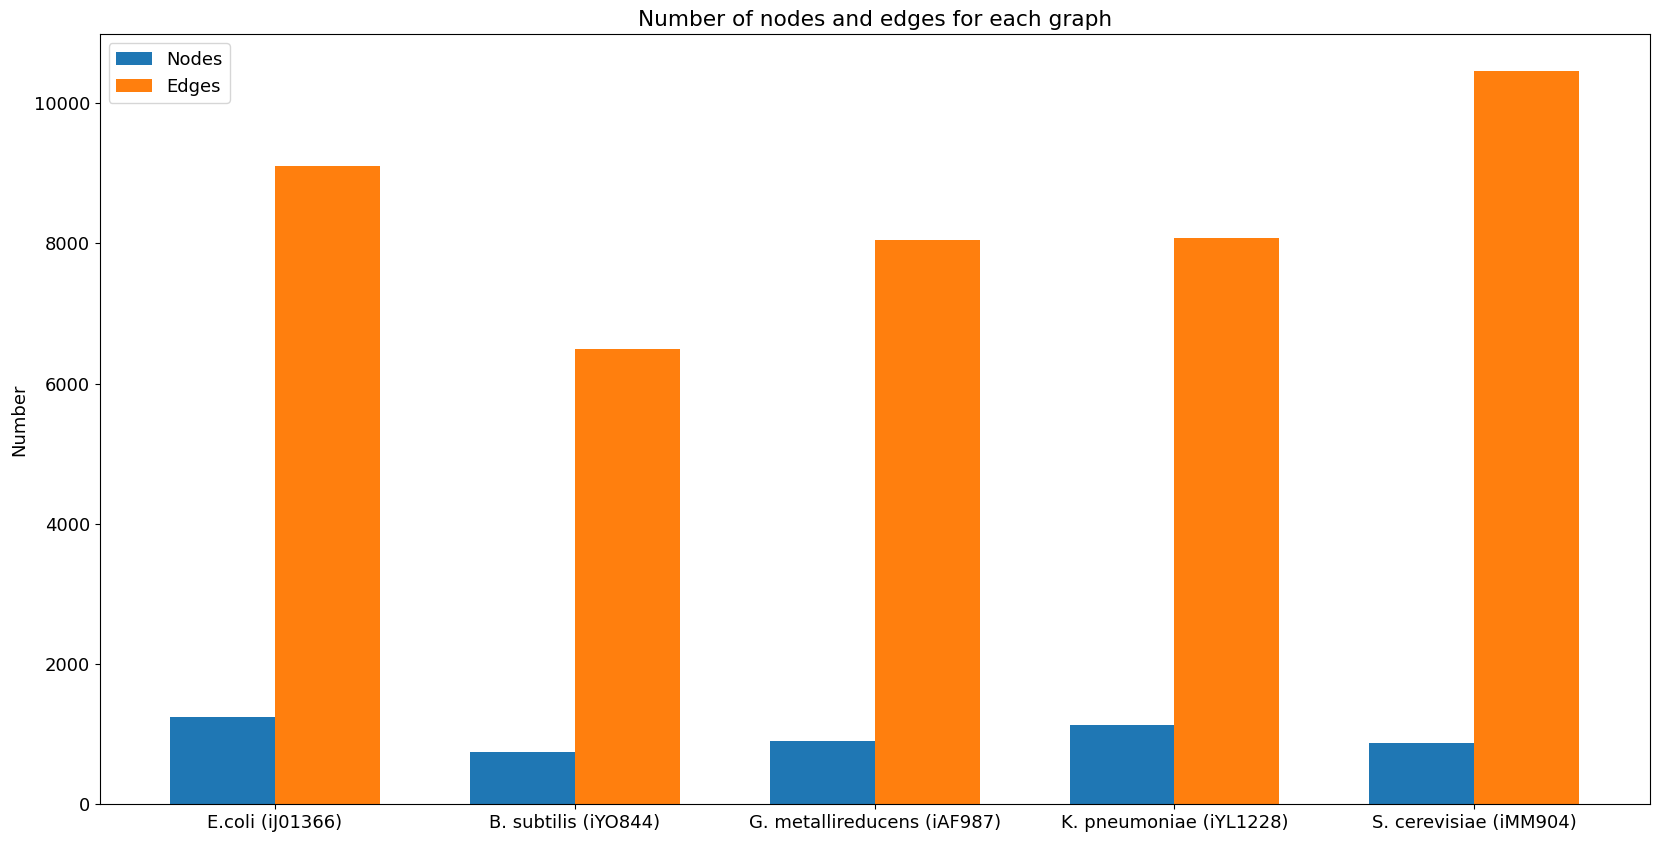

In [14]:
#plot the number of nodes and edges as a bar chart for each graph
edges = []
nodes = []
for sheet in sheet_names:
    edges.append(len(graphs[sheet].edges))
    nodes.append(len(graphs[sheet].nodes))
fig, ax = plt.subplots(figsize=(20,10))
x = np.arange(len(sheet_names))
width = 0.35
rects1 = ax.bar(x - width/2, nodes, width, label='Nodes')
rects2 = ax.bar(x + width/2, edges, width, label='Edges')
ax.set_ylabel('Number')
ax.set_title('Number of nodes and edges for each graph')
ax.set_xticks(x)
ax.set_xticklabels(sheet_names)
ax.legend()
plt.rcParams.update({'font.size': 15})

plt.show()


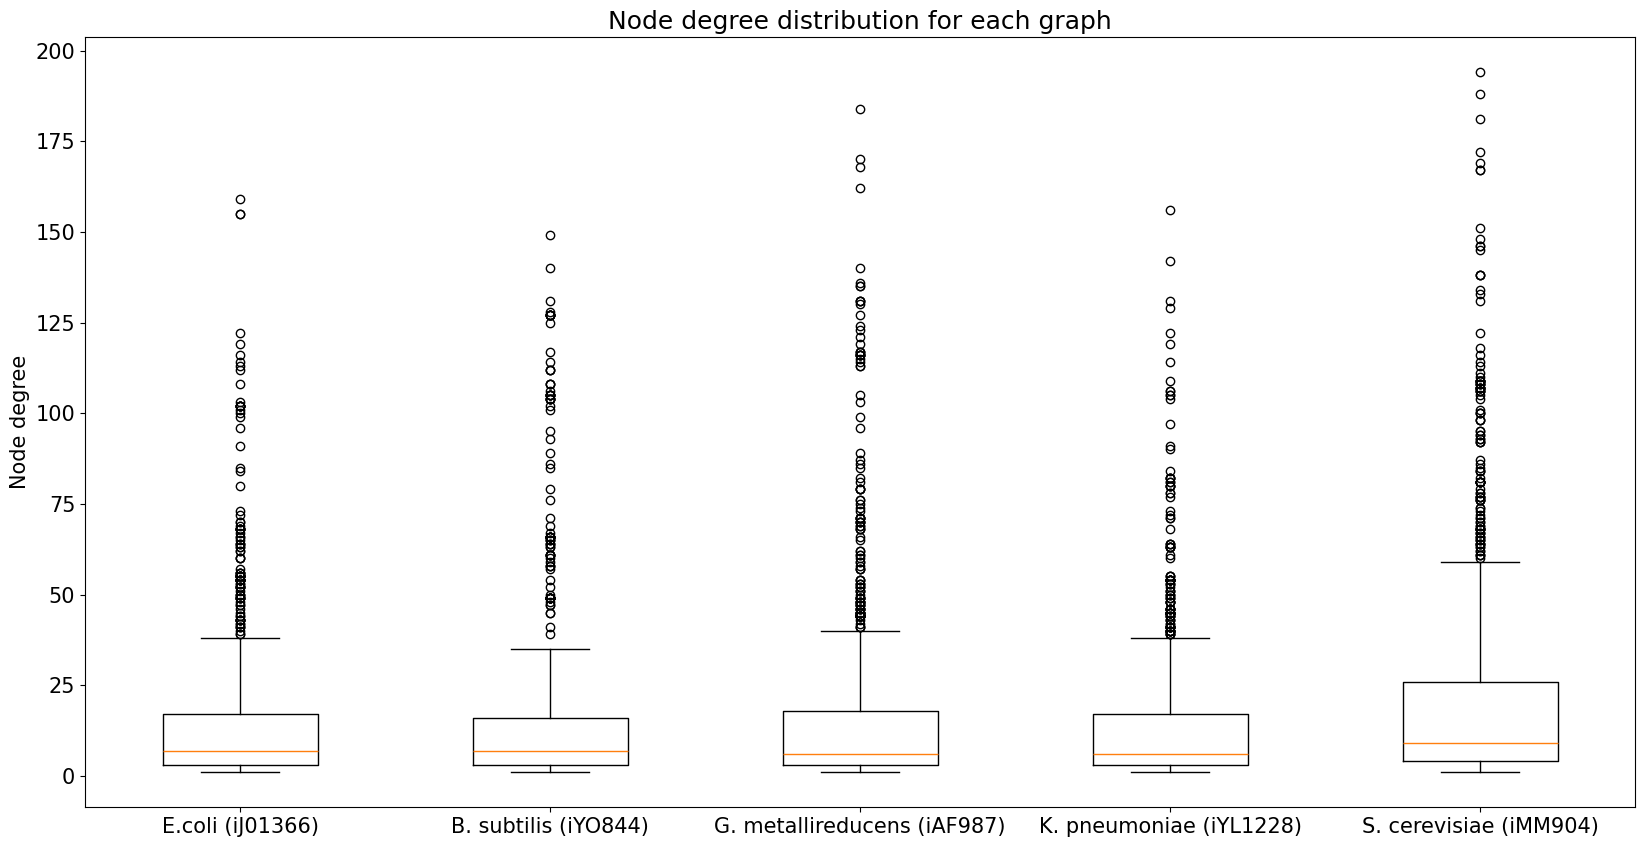

In [17]:
node_degrees = []
for sheet in sheet_names:
    node_degrees.append(list(dict(nx.degree(graphs[sheet])).values()))

fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot(node_degrees)
ax.set_xticklabels(sheet_names)
ax.set_ylabel('Node degree')
ax.set_title('Node degree distribution for each graph')
plt.rcParams.update({'font.size': 15})
plt.show()


In [58]:
ecoli_bridging_centrality = nx.betweenness_centrality(graphs["E.coli (iJ01366)"], weight='weight', normalized = False)
ecoli_bridging_centrality_values = list(ecoli_bridging_centrality.values())
log10_unique_centrality_values = [np.log10(value + 1) for value in ecoli_bridging_centrality_values]


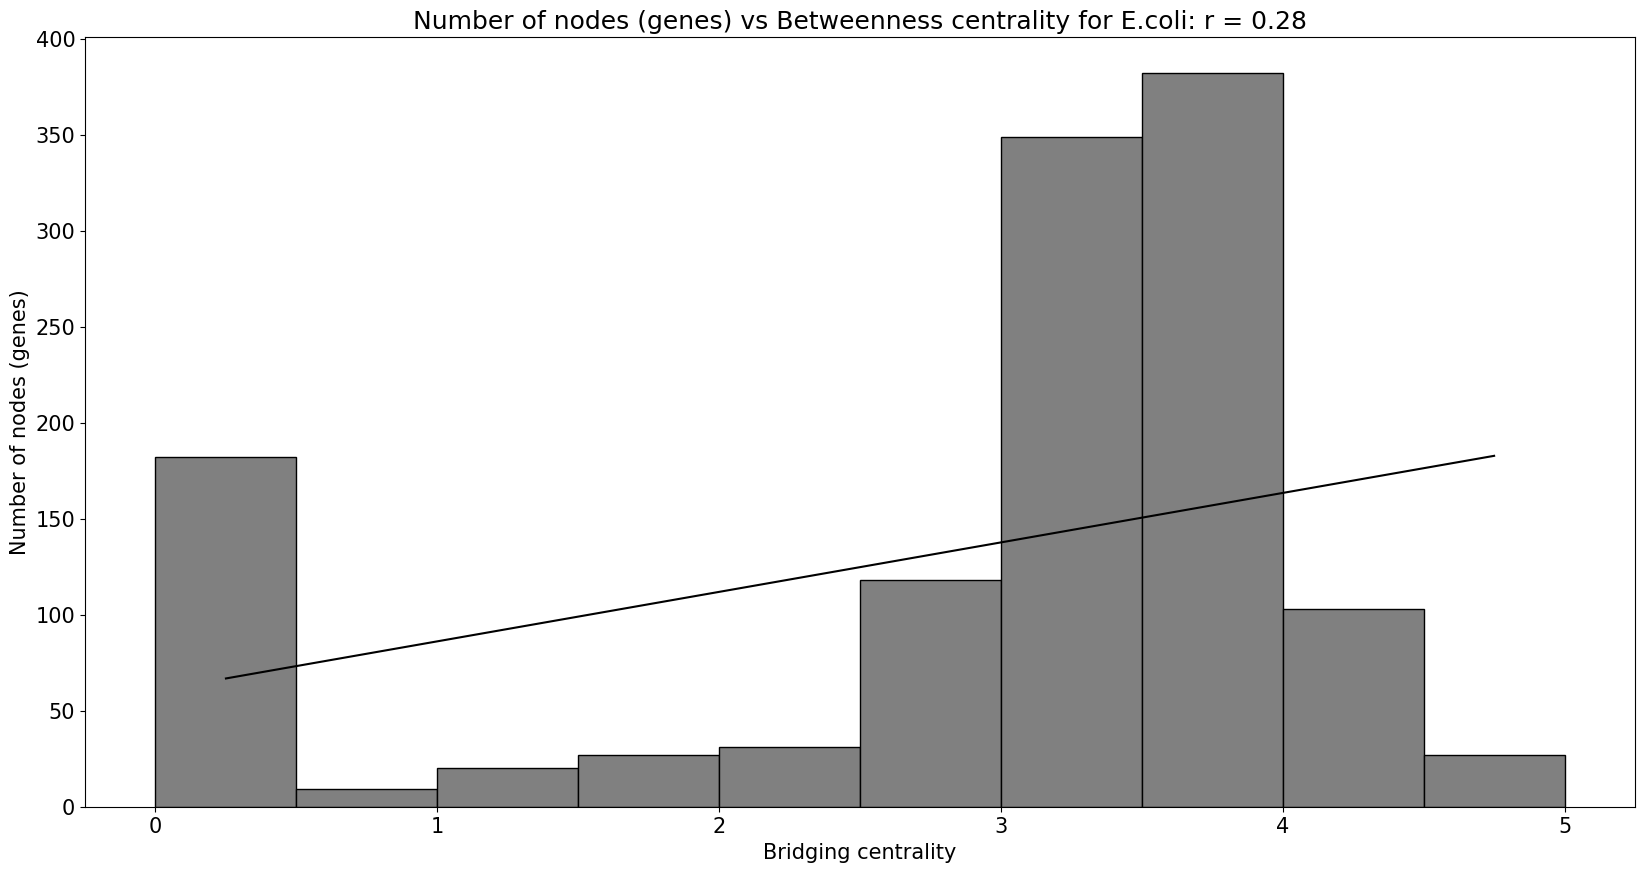

In [60]:

import numpy as np
from scipy.stats import linregress

fig, ax = plt.subplots(figsize=(20,10))
bins = np.arange(0, 5.5, 0.5)
hist_data, bin_edges = np.histogram(log10_unique_centrality_values, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
slope, intercept, r_value, p_value, std_err = linregress(bin_centers, hist_data)
x_values = np.linspace(min(bin_centers), max(bin_centers), 100)
y_values = slope * x_values + intercept
ax.hist(log10_unique_centrality_values, bins=bins, color='gray', edgecolor='black')
ax.plot(x_values, y_values, color='black')

ax.set_xlabel('Bridging centrality')
ax.set_ylabel('Number of nodes (genes)')
ax.set_title(f'Number of nodes (genes) vs Betweenness centrality for E.coli: r = {r_value:.2f}')
plt.rcParams.update({'font.size': 15})
plt.show()


In [32]:
import cobra
from cobra.io import read_sbml_model
from pathlib import Path
import os

#Fixing typo in supplimentary table from the paper
index = sheet_names.index("E.coli (iJ01366)")
sheet_names[index] = "E.coli (iJO1366)"


Micro_models = {}
for sheet in sheet_names:
    model_name = sheet.split('(')[1].split(')')[0]
    model_path = Path('Data/'+model_name+'.xml')
    if os.path.isfile(model_path):
        Micro_models[sheet] = read_sbml_model(str(model_path))
    else:
        print(f"File {model_path} does not exist.")

In [33]:
Micro_models

{'E.coli (iJO1366)': <Model iJO1366 at 0x289ee06a0>,
 'B. subtilis (iYO844)': <Model iYO844 at 0x29703eaf0>,
 'G. metallireducens (iAF987)': <Model iAF987 at 0x29598fc40>,
 'K. pneumoniae (iYL1228)': <Model iYL1228 at 0x28c7d7970>,
 'S. cerevisiae (iMM904)': <Model iMM904 at 0x28e9a3190>}